# Part I - An Investigation into Attributes of NYC Boroughs 
## by Darcy McCusker

## Introduction

The dataset is of more than 6,000 New York City blocks and contains information about the Community Development Block Grant (CDBG) eligibilty, walk score, population, number of households, number of housing units, borough, and percent low and moderate income. It is combined from data on New York City tracts that are eligible for CDBGs and data about walk score for each census block. Note that one data source is about tracts, which are generally made up of 1-5 blocks. The varaibles are as follows: 

>TRACTCE: Census tract number </br>
>BLKGRPCE: Block number	</br>
>TotPop: Total population for the census block	</br>
>CountHU: Number of housing units for the census block	</br>
>HH: Number of households (occupied housing units) for the census block	</br>
>NatWalkInd: National Walk Score Index. Varies from 1 to 20, where 20 is more walkable	</br>
>TRACTStr: Census tract number as a string with appropriate leading zeroes</br>	
>BoroID: Code for which borough each census tract is located in	</br>
>BoroCT: Combination of TRACT Str and BoroID	</br>
>TotalPop: Total population of the census tract	</br>
>LowMod_Pop: Total population of the census tract with low or moderate income, as defined by the Census Bureau	</br>
>LowMod_Pct: Percent of the census tract with low or moderate income	</br>
>Eligibility: Whether a tract is eligibile for a CDBG </br>

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Walkability_and_CBDG_eligiblity_by_census_block_merged.csv')

In [3]:
df.head()

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility
0,25900,2,1278,448,405,17.333333,25900,4,4025900,3350,2565,0.765672,CD Eligible
1,25900,1,2397,721,699,16.000000,25900,4,4025900,3350,2565,0.765672,CD Eligible
2,16600,2,1568,447,447,14.333333,16600,4,4016600,3395,1760,0.518409,CD Eligible
3,16600,1,2443,645,617,14.500000,16600,4,4016600,3395,1760,0.518409,CD Eligible
4,122702,1,2363,962,962,9.666667,122702,4,4122702,7010,5370,0.766049,CD Eligible


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TRACTCE      6490 non-null   int64  
 1   BLKGRPCE     6490 non-null   int64  
 2   TotPop       6490 non-null   int64  
 3   CountHU      6490 non-null   int64  
 4   HH           6490 non-null   int64  
 5   NatWalkInd   6490 non-null   float64
 6   TRACTStr     6490 non-null   int64  
 7   BoroID       6490 non-null   int64  
 8   BoroCT       6490 non-null   int64  
 9   TotalPop     6490 non-null   int64  
 10  LowMod_Pop   6490 non-null   int64  
 11  LowMod_Pct   6490 non-null   float64
 12  Eligibility  6490 non-null   object 
dtypes: float64(2), int64(10), object(1)
memory usage: 659.3+ KB


### What is the structure of your dataset?

The dataset is of more than 6,000 New York City blocks and contains information about the Community Development Block Grant (CDBG) eligibilty, walk score, population, number of households, number of housing units, borough, and percent low and moderate income. Eligibility and borough are both nominal. Population, number of households, number of housing units are discrete quantitative variables, and walk score percent low and moderate income are continuous quantitative varialbes. 

### What is/are the main feature(s) of interest in your dataset?

I'm especially interested in the relationships between walk score and other variables. Are blocks with larger household sizes more walkable? Are lower income people living in less or more walkable places than higher income people? How does the borough impact household size, walk score, and percent lower income? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset contains the necessary information to investigate these questions. 

## Univariate Exploration


First, where are the blocks located? Let's a make a dictionary to help us label the boroughs with their names instead of numbers,

In [5]:
boro_dict = {1 : "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
print(boro_dict)

{1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}


In [6]:
df['Borough'] = df['BoroID']

In [7]:
df['Borough'].replace(boro_dict,inplace=True)
df.sample(20)

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility,Borough
6341,7500,1,1522,515,477,14.666667,7500,2,2007500,5510,4870,0.883848,CD Eligible,Bronx
3607,20300,2,1558,0,0,13.333333,20300,1,1020300,830,625,0.753012,Ineligible,Manhattan
2991,85200,1,0,0,0,10.666667,85200,3,3085200,0,0,0.000000,Ineligible,Brooklyn
3695,157901,5,706,214,214,15.833333,157901,4,4157901,4990,1385,0.277555,Ineligible,Queens
713,69000,2,1700,459,428,14.833333,69000,4,4069000,3455,1850,0.535456,CD Eligible,Queens
3025,35500,1,1510,865,742,15.500000,35500,3,3035500,5620,4355,0.774911,CD Eligible,Brooklyn
3929,29102,0,0,0,0,1.000000,29102,5,5029102,2805,825,0.294118,Ineligible,Staten Island
5130,128300,1,0,0,0,8.666667,128300,4,4128300,30,30,1.000000,Ineligible,Queens
226,8700,3,2500,714,656,12.000000,8700,4,4008700,5110,4305,0.842466,CD Eligible,Queens
5740,19700,2,606,334,334,14.666667,19700,3,3019700,3485,1160,0.332855,Ineligible,Brooklyn


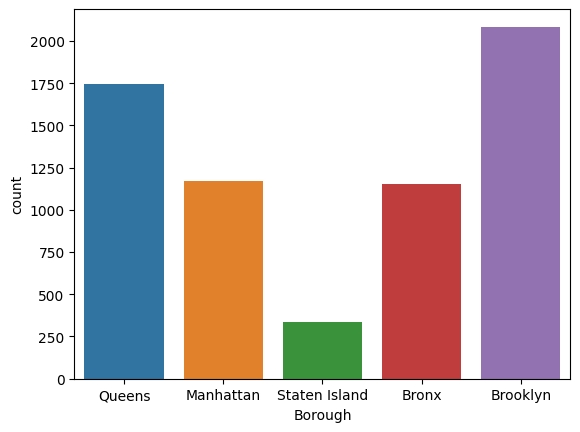

In [8]:
sns.countplot(data=df,x = "Borough" );

Brooklyn has the most census blocks, while Staten Island has the least (by far).

Next, let's look at the distribution of walk scores for the entire city. 

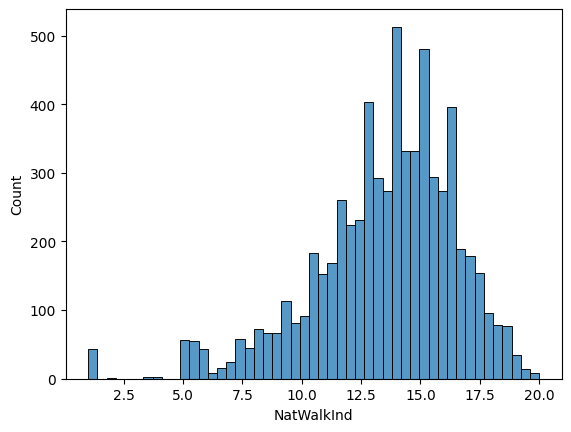

In [9]:
sns.histplot(data=df, x = "NatWalkInd");

Seaborn selected the bin size automatically. Let's pick a few possible bin widths and see how it changes the histogram. I'll also turn on the kernal density estimate parameter to get a stronger sense of the shape of the data.

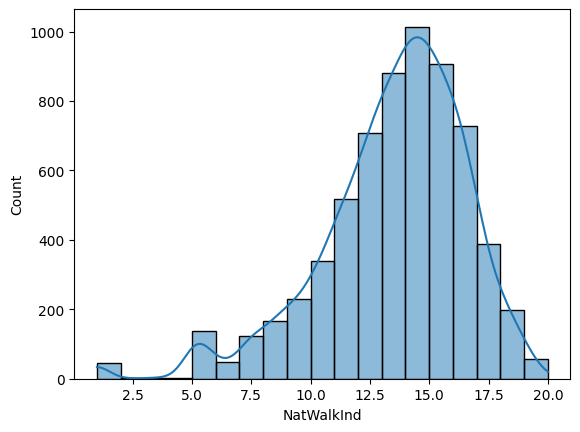

In [10]:
sns.histplot(data=df, x = "NatWalkInd", binwidth = 1, kde=True);

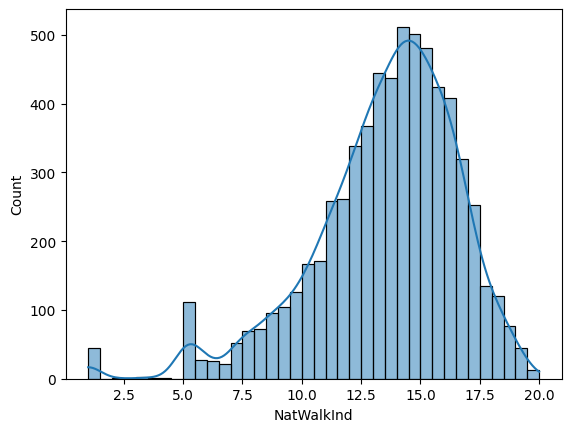

In [11]:
sns.histplot(data=df, x = "NatWalkInd", binwidth = .5, kde=True);

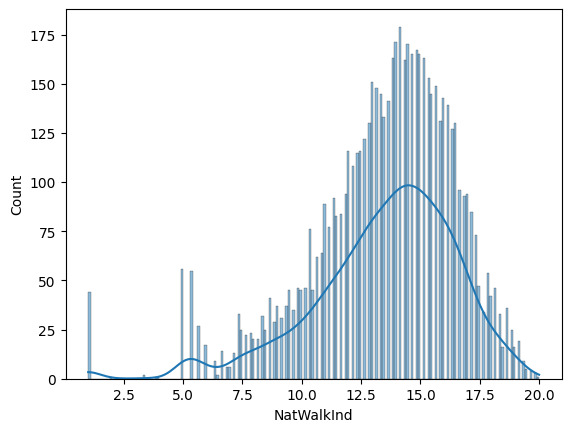

In [12]:
sns.histplot(data=df, x = "NatWalkInd", binwidth = .1, kde=True);

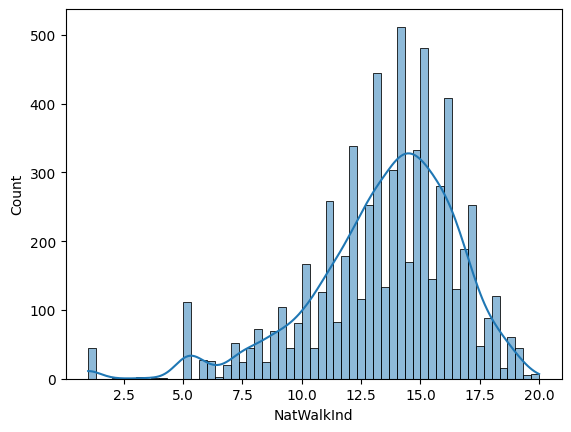

In [13]:
sns.histplot(data=df, x = "NatWalkInd", binwidth = (1/3), kde=True);

Out of all the graphs, bin size of 1/3 makes the most sense. That's because if we look at the data, all the walk scores have decimal points that correspond to 1/6ths. 

In [14]:
df.sample(10)

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility,Borough
782,4800,7,0,0,0,13.666667,4800,1,1004800,6075,1925,0.316872,Ineligible,Manhattan
2981,50600,3,1813,569,569,9.166667,50600,3,3050600,5625,3765,0.669333,CD Eligible,Brooklyn
5842,23000,3,1623,358,348,12.333333,23000,3,3023000,3835,3275,0.853977,CD Eligible,Brooklyn
5416,7700,4,1315,596,552,15.833333,7700,3,3007700,4380,955,0.218037,Ineligible,Brooklyn
1461,22301,3,1909,782,782,15.333333,22301,1,1022301,7970,6630,0.831870,CD Eligible,Manhattan
2682,27000,2,1119,431,411,13.666667,27000,3,3027000,2540,1505,0.592520,CD Eligible,Brooklyn
6185,40502,4,1447,450,423,14.166667,40502,2,2040502,5925,4660,0.786498,CD Eligible,Bronx
2760,28300,2,1281,555,467,8.833333,28300,3,3028300,3990,3215,0.805764,CD Eligible,Brooklyn
3173,57900,1,731,359,330,15.333333,57900,3,3057900,1020,530,0.519608,Ineligible,Brooklyn
3345,16901,1,1396,590,540,16.166667,16901,5,5016901,3270,1290,0.394495,Ineligible,Staten Island


If we divide the bins any smaller, we will essentially create a bar plot with one score per bin, but at this bin width, there are two scores in every bin. Any larger of bins and we miss some of the granularity: some scores are genuinely less common. However, all the plots show an approximartely normal distribution with a peak close to 15. So the median block in the dataset probably has a walk score of a little less than 15. 

There also appear to be some very low values for walk score. 

Let's look at a box plot that will help identify outliers.

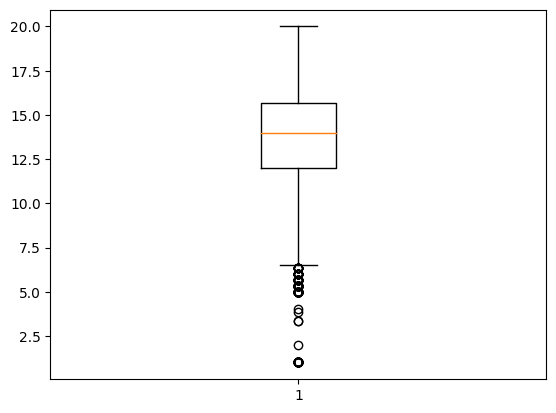

In [15]:
plt.boxplot(data=df, x ="NatWalkInd");

There are a number of outliers identified. One option would be to replace them with the mean. In this case, however, these outliers are likely meaningful: there simply are places that are just not very walkable in NYC. Changing them or throwing them out would make the analysis worse, but it's worthwhile to know they're there and to think carefully if there might be a reason to exclude them from some questions. 

In [16]:
df.query('NatWalkInd < 7')

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility,Borough
15,148300,0,0,0,0,1.000000,148300,4,4148300,2920,620,0.212329,Ineligible,Queens
368,10701,0,0,0,0,1.000000,10701,4,4010701,0,0,0.000000,Ineligible,Queens
443,92200,0,0,0,0,5.333333,92200,4,4092200,2085,360,0.172662,Ineligible,Queens
677,98100,0,0,0,0,5.000000,98100,4,4098100,2435,955,0.392197,Ineligible,Queens
738,38301,0,0,0,0,5.000000,38301,4,4038301,0,0,0.000000,Ineligible,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,5001,2,1607,558,509,6.833333,5001,2,2005001,4575,3775,0.825137,CD Eligible,Bronx
6224,11000,0,0,0,0,1.000000,11000,2,2011000,155,30,0.193548,Ineligible,Bronx
6283,11800,0,0,0,0,1.000000,11800,2,2011800,4025,1085,0.269565,Ineligible,Bronx
6403,8400,1,869,244,226,6.333333,8400,2,2008400,2290,1210,0.528384,CD Eligible,Bronx


There's no obvious pattern to why these blocks all have very low block scores, but there is no reason to think the walk scores are inaccurate. 

Another variable of interest is the household size of each block. Let's calculate the household size using the total population for the block (TotPop) divided by the number of households. Then let's look at a histogram. 

In [17]:
df['HH_Size'] = df['TotPop'] / df['HH']

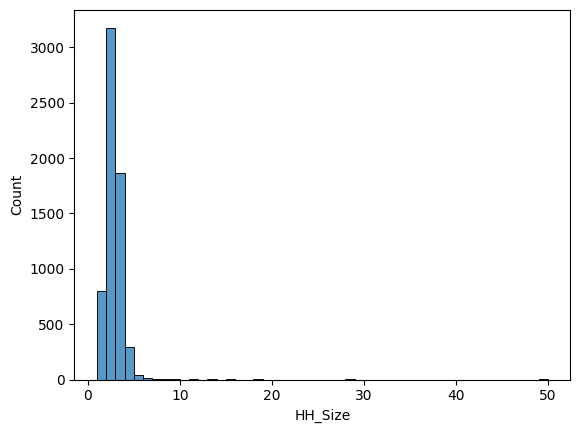

In [18]:
sns.histplot(data=df,x="HH_Size",binwidth = 1);

It looks like there are some blocks with very large household sizes! Let's take a look at just those with more than 5 people per household on average. 

(0.0, 50.0)

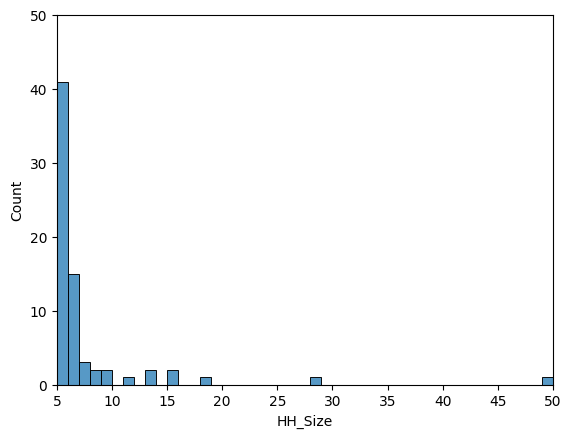

In [19]:
sns.histplot(data=df,x="HH_Size",binwidth = 1);
plt.xlim(5,50)
plt.ylim(0,50)

In [20]:
df.query('HH_Size > 7')

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility,Borough,HH_Size
276,126700,1,3043,215,196,10.000000,126700,4,4126700,2415,1110,0.459627,Ineligible,Queens,15.525510
1406,32000,2,1034,21,21,15.000000,32000,4,4032000,4380,1840,0.420091,Ineligible,Queens,49.238095
1865,6200,1,1902,200,200,10.500000,6200,1,1006200,2685,1075,0.400372,Ineligible,Manhattan,9.510000
2038,21200,2,52,0,0,12.500000,21200,1,1021200,4175,2745,0.657485,Ineligible,Manhattan,inf
2243,138502,1,40,0,0,12.666667,138502,4,4138502,0,0,0.000000,Ineligible,Queens,inf
2365,20500,2,1562,233,207,17.000000,20500,1,1020500,2525,655,0.259406,Ineligible,Manhattan,7.545894
2477,39700,1,3214,269,269,14.666667,39700,2,2039700,1385,1175,0.848375,Ineligible,Bronx,11.947955
3503,19900,1,348,0,0,17.000000,19900,4,4019900,620,355,0.572581,Ineligible,Queens,inf
3564,14300,1,3,0,0,14.666667,14300,1,1014300,0,0,0.000000,Ineligible,Manhattan,inf
3607,20300,2,1558,0,0,13.333333,20300,1,1020300,830,625,0.753012,Ineligible,Manhattan,inf


Some of the values are likely the result of mistakes when the data was recorded, but there are also infinite values! I'll replace these values over 7 and the infinite values with the mean. I'll first replace the infinte values with 8 (to make sure they'll be caught in the replacement of values over 7) then calculate the mean (otherwise the mean will come out to be infinity!). 

In [21]:
df.replace(np.inf,8, inplace=True)
col_mean = df['HH_Size'].mean()
df['HH_Size'] = df['HH_Size'].apply(lambda x: col_mean if x > 7 else x)


Now, let's replot. 

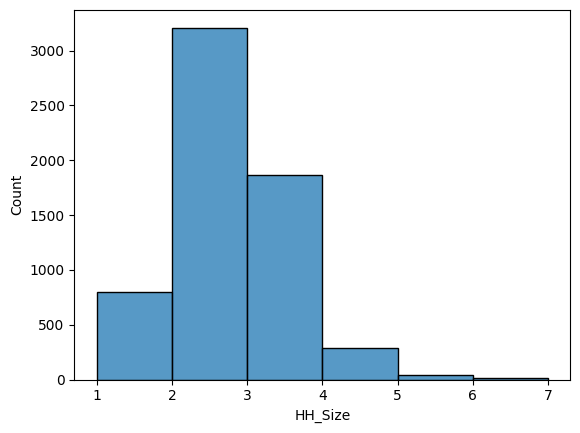

In [22]:
sns.histplot(data=df,x="HH_Size",binwidth = 1);

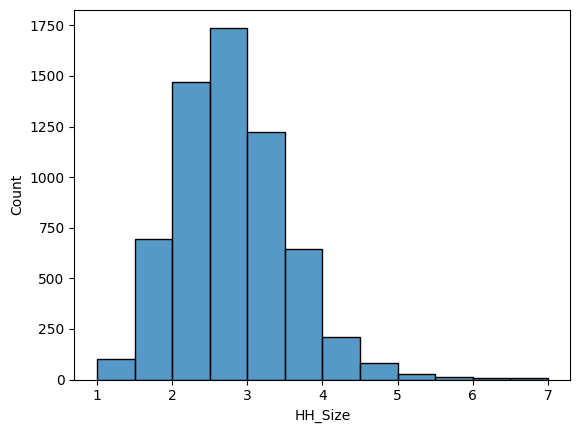

In [23]:
sns.histplot(data=df,x="HH_Size",binwidth = .5);

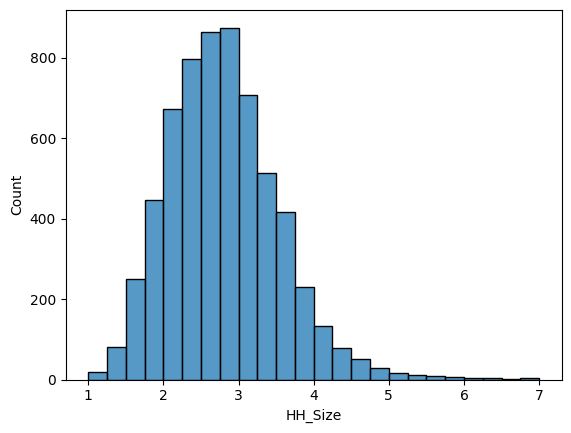

In [24]:
sns.histplot(data=df,x="HH_Size",binwidth = .25);

Now that it's easier to see where all the data really is, a smaller bin size makes sense to get more granulairty in the data. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The histogram of walk scores showed a few very low scores and the boxplot of the same ideitfied those points as outliers, but I did not transform them because they appear to be valid data points.  



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, household size had a number of unusually large values that are likely mistakes in data collection (an average of 50 people don't live in one household!). I replaced those values with the mean of the household size column.

## Bivariate Exploration

Let's start by exploring the relationship between walk score and low/moderate income percentage. 

In [ ]:
sns.scatterplot(data=df,x="NatWalkInd",y="LowMod_Pct");

This just makes a big blob. Let's try increasing the transparency of the points to better see any relationships. 

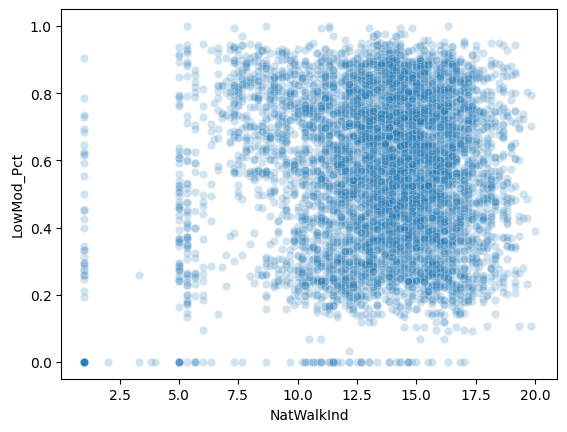

In [26]:
sns.scatterplot(data=df,x="NatWalkInd",y="LowMod_Pct",alpha=1/5);

It's still hard to see what's going on here. Let's try looking at a smaller subset of the data. 

In [27]:
df_sample = df.sample(250,random_state=1)
df_sample.head()

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility,Borough,HH_Size
4211,73600,2,1214,436,410,16.000000,73600,3,3073600,3615,1955,0.540802,CD Eligible,Brooklyn,2.960976
4921,49302,2,1660,520,498,18.666667,49302,4,4049302,2180,1045,0.479358,Ineligible,Queens,3.333333
4339,46000,1,1124,460,417,12.833333,46000,3,3046000,4025,2480,0.616149,CD Eligible,Brooklyn,2.695444
1814,4100,5,1243,779,573,17.666667,4100,1,1004100,7505,4005,0.533644,CD Eligible,Manhattan,2.169284
3258,15100,5,1151,630,462,18.500000,15100,5,5015100,4810,1150,0.239085,Ineligible,Staten Island,2.491342


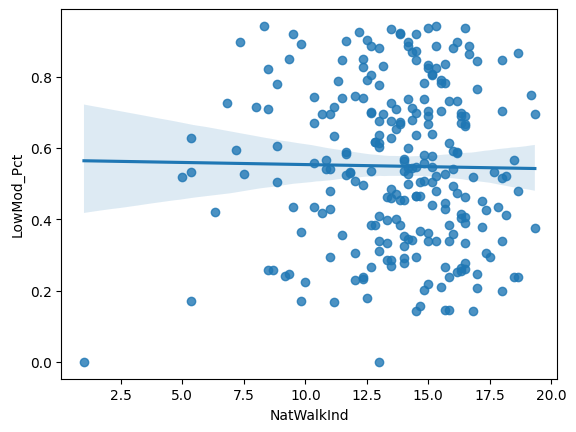

In [28]:
sns.regplot(data=df_sample,x="NatWalkInd",y="LowMod_Pct");

If we try to plot the linear regression with the smaller subset, it's easy to see there is a lot of uncertainty in the relationship. There is a slight negative relationship, though. Let's see if we can reproduce that with another subset of the data. 

In [29]:
df_sample = df.sample(250,random_state=3)

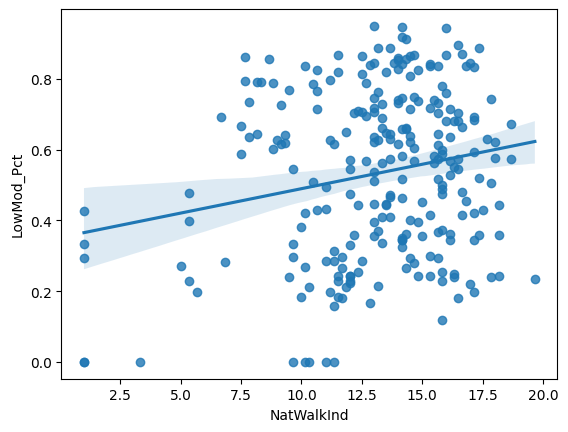

In [30]:
sns.regplot(data=df_sample,x="NatWalkInd",y="LowMod_Pct");

The slope of the line changed for this subset and the margin of error goes from slightly positive to slightly negative. It appears there is no strong relationship between walk score and percent low and moderate income. 

Next, let's look at walk score vs. household size. 

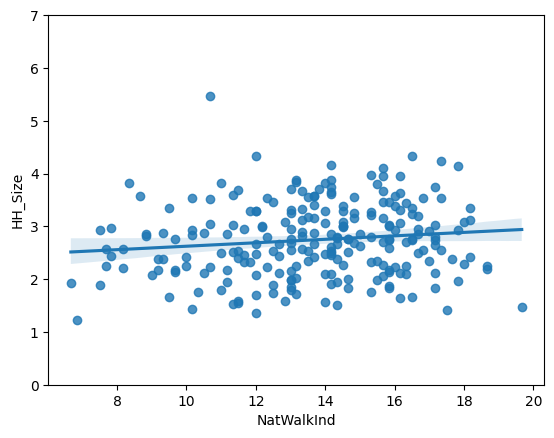

In [31]:
sns.regplot(data=df_sample,x="NatWalkInd",y="HH_Size")
plt.ylim(0,7);

It looks like there is again no clearly positive or negative relationship. 

Now, let's look at how walk score varies by borough.

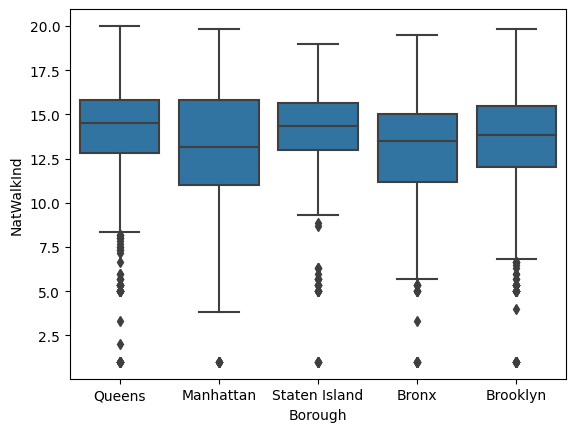

In [32]:
sns.boxplot(data=df, x='Borough', y='NatWalkInd', color='tab:blue');



Manhattan has the lowest mean walk score and the lowest minimum (outside of outliers). Staten Island has the smallest range and IQR, indiciating most blocks are similarly walkable to each other. Queens looks like it would win the "Most Walkable" award, since it has the highest or second highest median, maximum, and minimum although there are many outliers, as well. It might be worthwile to look at a violin plot. 

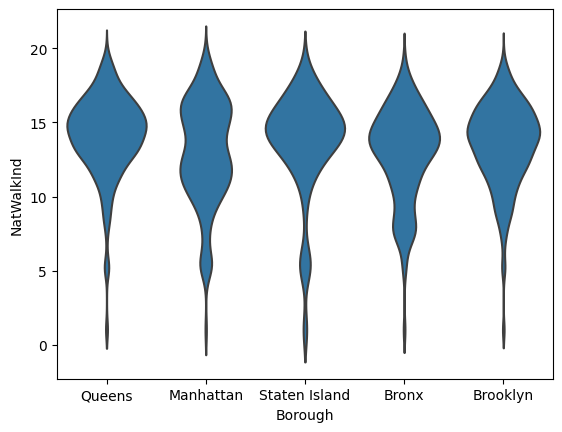

In [33]:
sns.violinplot(data=df, x='Borough', y='NatWalkInd', inner=None, color='tab:blue');

This plot makes the distributions look much more similar than the box plot did! The box plot conveys more information. 

Now, let's see how borough relates to eligibility for block grants. 

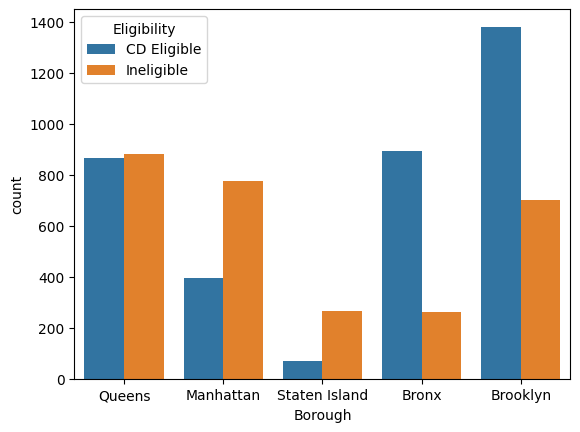

In [34]:
sns.countplot(data=df,x="Borough",hue="Eligibility" );

Manhattan has more ineligible than eligible blocks, as does Staten Island. 

Now, let's look at the relationship between borough and household size. 

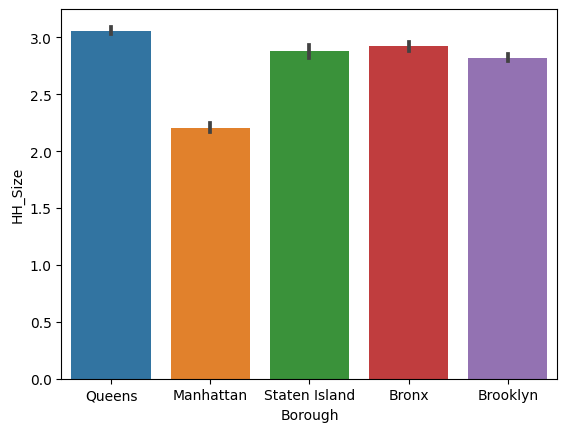

In [35]:
sns.barplot(df,x="Borough",y="HH_Size");

There are some differences between household size across boroughs! Manhattan has the smallest average household size, while Queens has the largest. Since the graph shows confidence intervals, we can see that Staten Island, Brooklyn, and the Bronx are all about the same, but there is a statistically significant difference with both Manhattan and Queens. 

Next, let's look at the relationship between borough and percent low and moderate income. I'll look at the few plots at once to get a real sense of the distribution of values. 

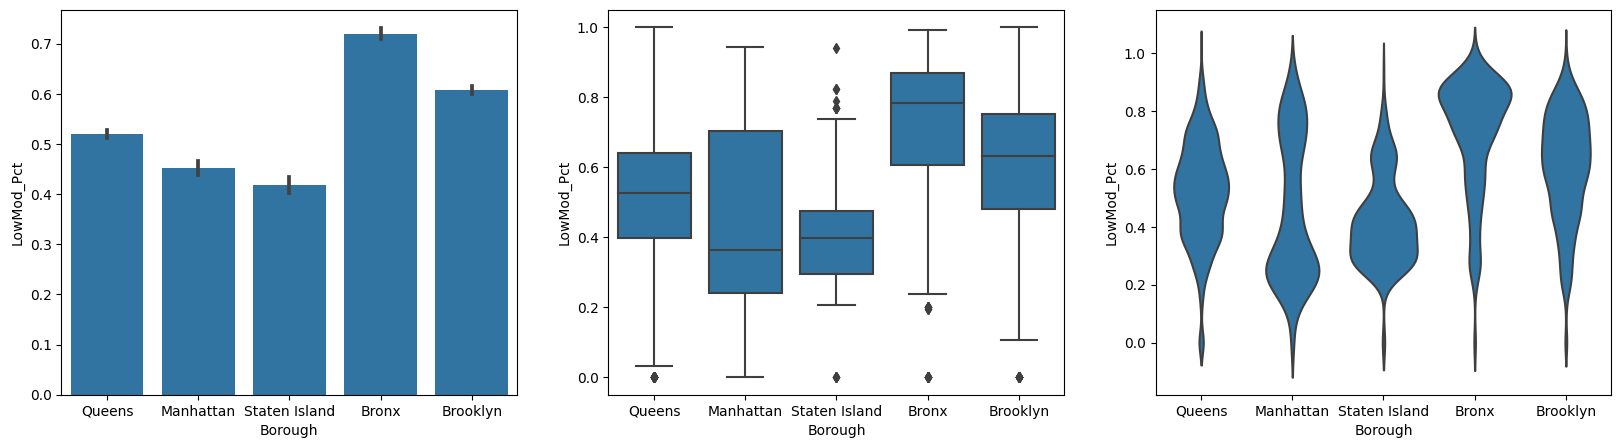

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.barplot(data=df, x='Borough', y='LowMod_Pct', color='tab:blue', ax=ax[0]);

sns.boxplot(data=df,x='Borough', y='LowMod_Pct', color='tab:blue', ax=ax[1]);

sns.violinplot(data=df, x='Borough', y='LowMod_Pct', inner=None, color='tab:blue', ax=ax[2]);


Wow! Each of these plots shows something interesting. The bar plot shows that the Bronx has the most low and moderate income blocks, while Manhattan and Staten Island have the lowest. The box plot and the violin plot both show the distributuon in different ways. Staten Island has the smallest overall range and IQR. Manhattan has a large IQR, which in the violin plot, it's clearer why: there are a lot of blocks clustered around 25% low/moderate income, and another smaller cluster around 80%. Queens and Brooklyn have similarly shaped box and violin plots, but Brooklyn has more low/moderate income blocks on average than Queens. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I failed to find a relationship between walk score and percent low/moderate income. The relationship between walk score and borough showed some more interesting patterns. Manhattan was less walkable than I expected, given its reputation, but the other boroughs had similar distributions of walk score. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, the other variables provided much more interesting relationships. The relationship between borough and percent low and moderate income is shown in detail by the three charts I created. While it's pretty well known that the Bronx is the poorest of all the boroughs, I was surprised that Staten Island has essentially the same amount of low income blocks as Manhattan. Manhattan's violin plot was also interesting, although it makes sense if you think a little bit about Manhattan; there are lots of highly concentrated areas of both rich people (UWS, UES, FiDi, etc) and of poverty (Harlem, Hamilton Heights, Inwood, housing projects). 



## Multivariate Exploration
First, let's look at walk score by borough as a scatter plot with a regression line. 

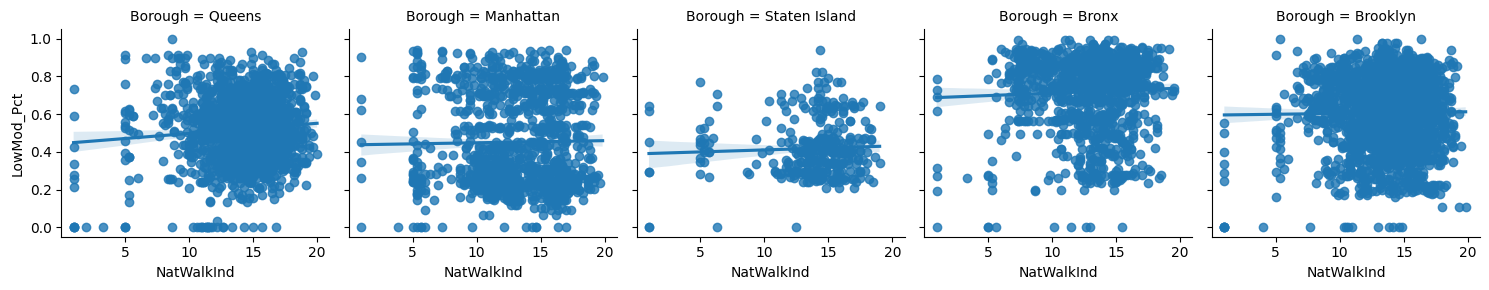

In [37]:
g = sns.FacetGrid(data=df, col='Borough')
g.map(sns.regplot, 'NatWalkInd','LowMod_Pct');


They mostly look like blobs with little to no relationship between them. Let's try sampling the data to see if it gets any clearer. 

In [38]:
df_sample = df.sample(500,random_state=1)

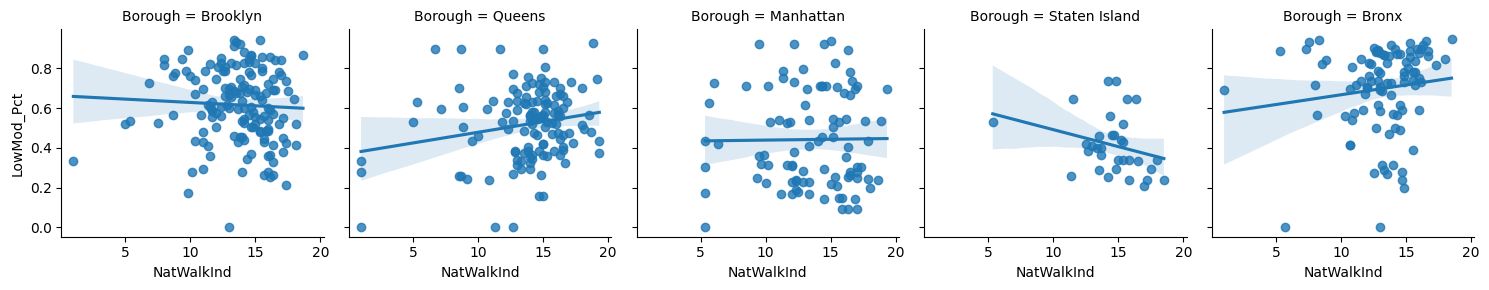

In [39]:
g = sns.FacetGrid(data=df_sample, col='Borough')
g.map(sns.regplot, 'NatWalkInd','LowMod_Pct');

The sampled plots are easier to read, and there appear to be some directional relationships, but the shaded cone around each line shows there is a lot of uncertainty, and the relationships may not be real. 

Let's look at walk score and household size, labeled with color by borough. 

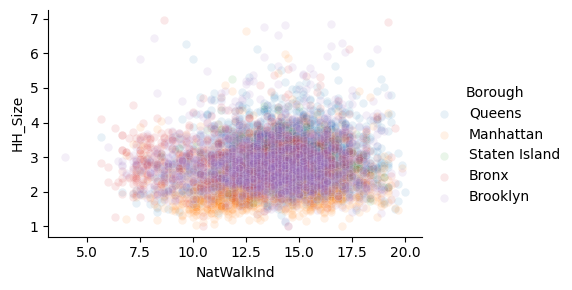

In [40]:
g = sns.FacetGrid(data=df, hue='Borough',
                 aspect=1.5)
g.map(sns.scatterplot,'NatWalkInd','HH_Size', alpha=1/10);
g.add_legend();


It's possible to see a few things here: Manhattan has smaller household sizes, which we already knew, given the higher amount of oragne near the bottom of the graph. But it also looks like there are more low walk score blocks in the Bronx and Brooklyn than has been obvious in other graphs (based on the amount of red and purple on the left side of the graph). Let's try it again with a smaller subset and see if any relationships are clearer. 

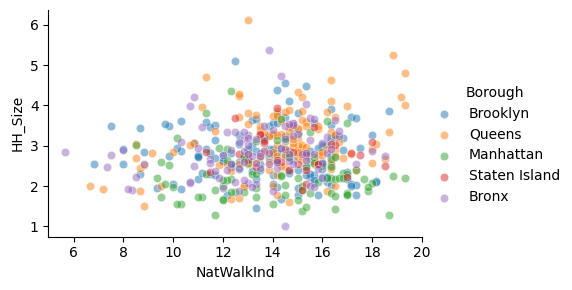

In [41]:
g = sns.FacetGrid(data=df_sample, hue='Borough',
                 aspect=1.5)
g.map(sns.scatterplot,'NatWalkInd','HH_Size', alpha=1/2);
g.add_legend();


The colors switched, but Manhattan stil has lower household sizes and the Bronx and Brooklyn have more low walk score blocks. 

Now, let's look for any interesting relationships we might've missed between our various numeric variables: household size, population, walk score, and percent low and moderate income. 


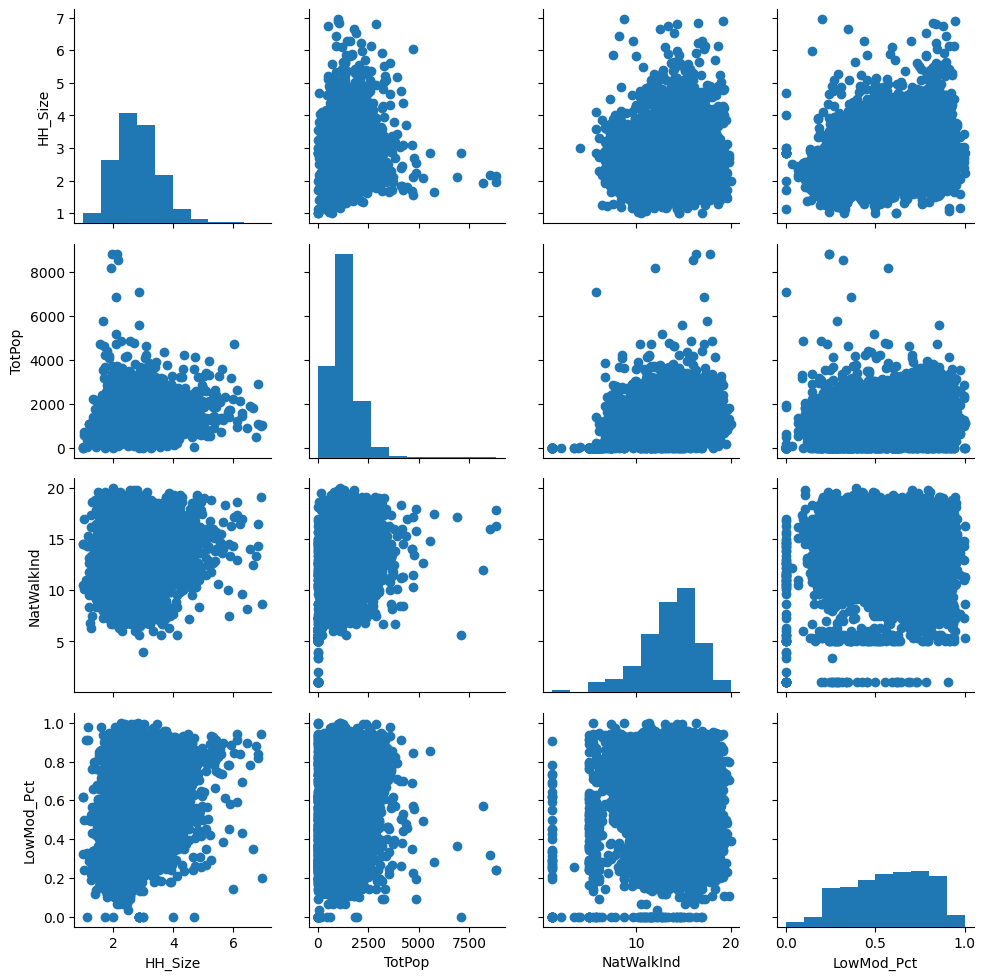

In [42]:
stats = ['HH_Size','TotPop','NatWalkInd','LowMod_Pct']
g = sns.PairGrid(data=df, vars=stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);


Looks like a lot of blobs. Let's see if a subset helps at all. 

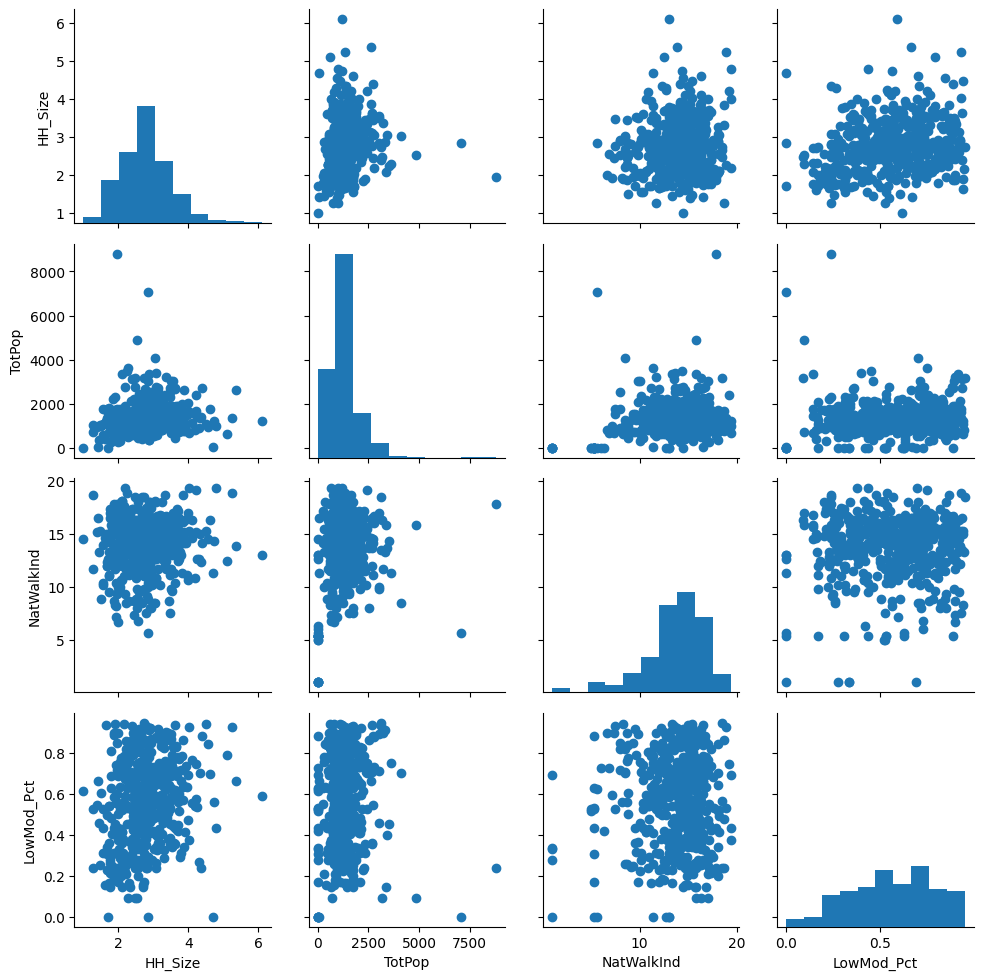

In [43]:
stats = ['HH_Size','TotPop','NatWalkInd','LowMod_Pct']
g = sns.PairGrid(data=df_sample, vars=stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

Still looks like blobs with no strong correlations. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I did not find any strong relationships between the variables investigated in this section. Walk score did not have any interesting impact on low and moderate percent by borough, and looking at household size and walkscore by borough only highlighted some relationships I'd already observed. There were no strong relationships when looking at the relationships among household size, population, walk score, and percent low and moderate income. 


### Were there any interesting or surprising interactions between features?
It was surprising how few interesting multivariate interactions there were!


## Conclusions
The questions I wanted to answer were:
> 1. Are blocks with larger household sizes more walkable? 
> 2. Are lower income people living in less or more walkable places than higher income people? 
> 3. How does the borough impact household size, walk score, and percent lower income? 

I found that there was no clear relationship between walk score and either household size or percent low and moderate income. I did find several interesting differences between boroughs, though. All the boroughs are pretty similar in terms of walkability, but differ quite a bit by household size and by percent moderate and low income, both in their averages and their distributions. So while the answers to the first two questions were no, I was able to find satisfying answers to the last question that I will highlight in my explanatory report. 